In [1]:
import csv
import sys

csv.field_size_limit(sys.maxsize)

131072

# Loading the Files

In [2]:
import pandas as pd

In [3]:
# df1 = pd.read_csv('CEAS_08.csv')
# df2 = pd.read_csv('Nazario.csv')
# df3 = pd.read_csv('Nigerian_Fraud.csv')
# df4 = pd.read_csv('TREC-05.csv', encoding='latin-1', engine="python")
# df5 = pd.read_csv('SpamAssasin.csv')

In [4]:
# df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [5]:
df = pd.read_csv(r'C:\Users\gis28\Downloads\Me\AIML\Phishing_dataset\main.csv')

# Cleaning the data

In [6]:
df.shape

(105863, 8)

In [7]:
df.columns

Index(['Unnamed: 0', 'sender', 'receiver', 'date', 'subject', 'body', 'label',
       'urls'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105863 entries, 0 to 105862
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  105863 non-null  int64  
 1   sender      105516 non-null  object 
 2   receiver    101540 non-null  object 
 3   date        103572 non-null  object 
 4   subject     103867 non-null  object 
 5   body        105272 non-null  object 
 6   label       105135 non-null  float64
 7   urls        105135 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ MB


In [9]:
df.describe()

,Unnamed: 0,label,urls
count,105863.000000,105135.000000,105135.000000
mean,52931.000000,0.488924,0.555419
std,30560.160111,0.499880,0.496922
min,0.000000,0.000000,0.000000
25%,26465.500000,0.000000,0.000000
50%,52931.000000,0.000000,1.000000
75%,79396.500000,1.000000,1.000000
max,105862.000000,1.000000,1.000000


In [10]:
df['date'].unique()

array(['Tue, 05 Aug 2008 16:31:02 -0700',
       'Tue, 05 Aug 2008 18:31:03 -0500',
       'Tue, 05 Aug 2008 20:28:00 -1200', ...,
       'Sun, 20 Jul 2003 16:19:44 +0800',
       'Wed, 05 Aug 2020 04:01:50 -1900', 'Wed, 04 Dec 2002 06:07:07'],
      shape=(102006,), dtype=object)

# Handling Date column

In [11]:
df['date_parsed'] = pd.to_datetime(
    df['date'],
    errors = 'coerce',
    utc = True
    )

In [12]:
df[['date', 'date_parsed']].head()

,date,date_parsed
0,"Tue, 05 Aug 2008 16:31:02 -0700",2008-08-05 23:31:02+00:00
1,"Tue, 05 Aug 2008 18:31:03 -0500",2008-08-05 23:31:03+00:00
2,"Tue, 05 Aug 2008 20:28:00 -1200",2008-08-06 08:28:00+00:00
3,"Tue, 05 Aug 2008 17:31:20 -0600",2008-08-05 23:31:20+00:00
4,"Tue, 05 Aug 2008 19:31:21 -0400",2008-08-05 23:31:21+00:00


In [13]:
df['date_parsed'].isna().sum()

np.int64(4377)

In [14]:
df['year'] = df['date_parsed'].dt.year
df['month'] = df['date_parsed'].dt.month
df['day'] = df['date_parsed'].dt.day
df['hour'] = df['date_parsed'].dt.hour
df['weekday'] = df['date_parsed'].dt.weekday

In [15]:
df['date_missing'] = df['date_parsed'].isna().astype(int)

for col in ['year','month','day','hour','weekday']:
    df[col] = df[col].fillna(df[col].median()).astype(int)

In [16]:
df['date_missing'].unique()

array([0, 1])

In [17]:
df.columns

Index(['Unnamed: 0', 'sender', 'receiver', 'date', 'subject', 'body', 'label',
       'urls', 'date_parsed', 'year', 'month', 'day', 'hour', 'weekday',
       'date_missing'],
      dtype='object')

In [18]:
df[['year', 'month', 'day', 'hour', 'weekday']].isna().sum()

year       0
month      0
day        0
hour       0
weekday    0
dtype: int64

## Senders column analysis

In [19]:
df['sender'].isnull().sum()

np.int64(347)

In [20]:
df['sender_missing'] = df['sender'].isna().astype(int)

In [21]:
df['sender'] = df['sender'].fillna('unknown_sender')

In [22]:
df['sender'].isna().sum()

np.int64(0)

# Handling Reciever column

In [23]:
df['receiver'].isnull().sum()

np.int64(4323)

In [24]:
df['receiver_missing'] = df['receiver'].isna().astype(int)

In [25]:
df['receiver'] = df['receiver'].fillna('unknown_receiver')

# Handling subject and body

In [26]:
df['subject'].isna().sum()

np.int64(1996)

In [27]:
df['subject'] = df['subject'].fillna('')
df['body'] = df['body'].fillna('')

In [28]:
df['subject'] = df['subject'].str.lower()
df['body'] = df['body'].str.lower()

In [29]:
df.columns

Index(['Unnamed: 0', 'sender', 'receiver', 'date', 'subject', 'body', 'label',
       'urls', 'date_parsed', 'year', 'month', 'day', 'hour', 'weekday',
       'date_missing', 'sender_missing', 'receiver_missing'],
      dtype='object')

In [30]:
df = df.drop('Unnamed: 0', axis=1)

In [31]:
df.head()

,sender,receiver,date,subject,body,label,urls,date_parsed,year,month,day,hour,weekday,date_missing,sender_missing,receiver_missing
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",never agree to be a loser,"buck up, your troubles caused by small dimensi...",1.0,1.0,2008-08-05 23:31:02+00:00,2008,8,5,23,1,0,0,0
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",befriend jenna jameson,\nupgrade your sex and pleasures with these te...,1.0,1.0,2008-08-05 23:31:03+00:00,2008,8,5,23,1,0,0,0
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",cnn.com daily top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1.0,1.0,2008-08-06 08:28:00+00:00,2008,8,6,8,2,0,0,0
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",re: svn commit: r619753 - in /spamassassin/tru...,would anyone object to removing .so from this ...,0.0,1.0,2008-08-05 23:31:20+00:00,2008,8,5,23,1,0,0,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",specialpricespharmmoreinfo,\nwelcomefastshippingcustomersupport\nhttp://7...,1.0,1.0,2008-08-05 23:31:21+00:00,2008,8,5,23,1,0,0,0


In [32]:
df.describe()

,label,urls,year,month,day,hour,weekday,date_missing,sender_missing,receiver_missing
count,105135.000000,105135.000000,105863.000000,105863.000000,105863.000000,105863.000000,105863.000000,105863.000000,105863.000000,105863.000000
mean,0.488924,0.555419,2003.788538,7.653222,12.650822,12.569113,2.524782,0.041346,0.003278,0.040836
std,0.499880,0.496922,6.586230,2.819935,8.285441,6.787327,1.490692,0.199090,0.057159,0.197911
min,0.000000,0.000000,1898.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2001.000000,8.000000,6.000000,7.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2002.000000,8.000000,8.000000,14.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2008.000000,9.000000,20.000000,18.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2100.000000,12.000000,31.000000,23.000000,6.000000,1.000000,1.000000,1.000000


In [33]:
df.duplicated().sum()

np.int64(110)

In [34]:
df = df.drop_duplicates(keep='first')

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.isnull().sum()

sender                 0
receiver               0
date                2197
subject                0
body                   0
label                618
urls                 618
date_parsed         4267
year                   0
month                  0
day                    0
hour                   0
weekday                0
date_missing           0
sender_missing         0
receiver_missing       0
dtype: int64

In [37]:
df = df.dropna(subset=['label','urls'])

In [38]:
df.isnull().sum()

sender                 0
receiver               0
date                1814
subject                0
body                   0
label                  0
urls                   0
date_parsed         3760
year                   0
month                  0
day                    0
hour                   0
weekday                0
date_missing           0
sender_missing         0
receiver_missing       0
dtype: int64

In [39]:
df['label'] = df['label'].astype(int)
df['urls'] = df['urls'].astype(int)

In [40]:
df.head()

,sender,receiver,date,subject,body,label,urls,date_parsed,year,month,day,hour,weekday,date_missing,sender_missing,receiver_missing
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",never agree to be a loser,"buck up, your troubles caused by small dimensi...",1,1,2008-08-05 23:31:02+00:00,2008,8,5,23,1,0,0,0
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",befriend jenna jameson,\nupgrade your sex and pleasures with these te...,1,1,2008-08-05 23:31:03+00:00,2008,8,5,23,1,0,0,0
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",cnn.com daily top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,2008-08-06 08:28:00+00:00,2008,8,6,8,2,0,0,0
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",re: svn commit: r619753 - in /spamassassin/tru...,would anyone object to removing .so from this ...,0,1,2008-08-05 23:31:20+00:00,2008,8,5,23,1,0,0,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",specialpricespharmmoreinfo,\nwelcomefastshippingcustomersupport\nhttp://7...,1,1,2008-08-05 23:31:21+00:00,2008,8,5,23,1,0,0,0


# Dropping Columns

In [41]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'date_parsed', 'year', 'month', 'day', 'hour', 'weekday',
       'date_missing', 'sender_missing', 'receiver_missing'],
      dtype='object')

In [42]:
drop_cols = ['receiver', 'date', 'date_parsed']
df = df.drop(columns=drop_cols)

In [43]:
df.columns

Index(['sender', 'subject', 'body', 'label', 'urls', 'year', 'month', 'day',
       'hour', 'weekday', 'date_missing', 'sender_missing',
       'receiver_missing'],
      dtype='object')

# EDA

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

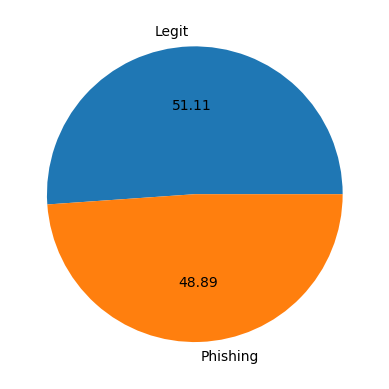

In [45]:
plt.pie(df['label'].value_counts(), labels=['Legit','Phishing'], autopct='%0.2f')
plt.show()

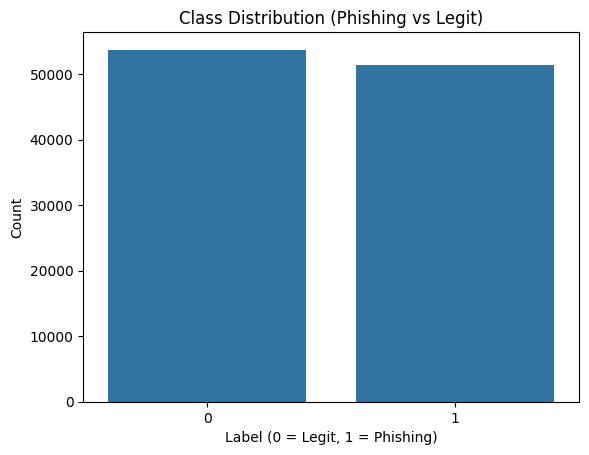

In [46]:
sns.countplot(x='label', data=df)
plt.title('Class Distribution (Phishing vs Legit)')
plt.xlabel('Label (0 = Legit, 1 = Phishing)')
plt.ylabel('Count')
plt.show()

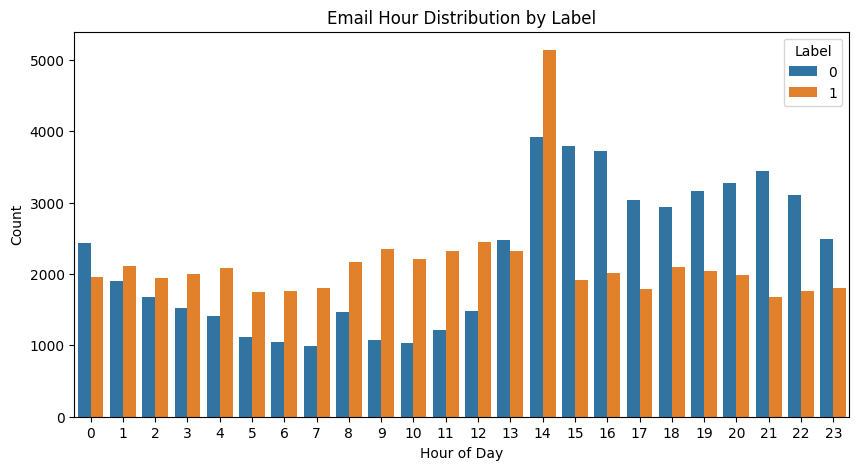

In [47]:
# hour vs label
plt.figure(figsize=(10,5))
sns.countplot(x='hour', hue='label', data=df)
plt.title('Email Hour Distribution by Label')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

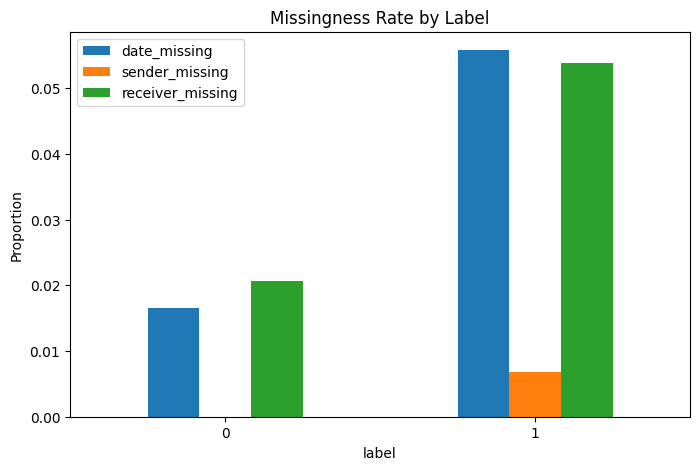

In [48]:
missing_cols = ['date_missing', 'sender_missing', 'receiver_missing']

missing_means = df.groupby('label')[missing_cols].mean().reset_index()

missing_means.plot(
    x='label',
    kind='bar',
    figsize=(8,5)
)
plt.title('Missingness Rate by Label')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

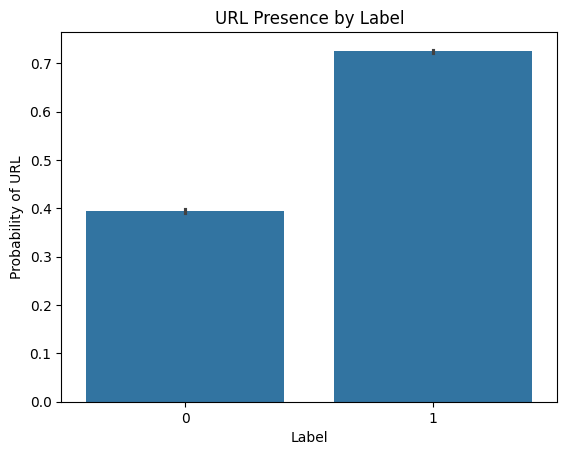

In [49]:
#url presence
sns.barplot(x='label', y='urls', data=df)
plt.title('URL Presence by Label')
plt.ylabel('Probability of URL')
plt.xlabel('Label')
plt.show()

# Preprocessing

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import WordNetLemmatizer

In [51]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gis28\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gis28\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gis28\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gis28\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()    

In [53]:
def parse_sender(sender):
    
    if pd.isna(sender) or not sender:
        return pd.Series({
            "sender_name": "unknown",
            "sender_email": "unknown"
        })
    
    sender = sender.lower()

    email_match = re.search(r'[\w\.-]+@[\w\.-]+', sender)

    if email_match:
        email = email_match.group(0)
    else:
        email = None

    if email and "@" in email:
        domain = email.split('@')[-1].replace('.', ' ')
    else:
        domain = "unknown"

    sender_name = re.sub(r'[\w\.-]+@[\w\.-]+',' ' ,sender)
    sender_name = re.sub(r'[<>"]', ' ', sender_name)
    sender_name = re.sub(r'[^a-z\s]','', sender_name)
    sender_name = re.sub(r'\s+', ' ', sender_name).strip()

    if not sender_name:
        sender_name = "unkown"
    
    return pd.Series({
        "sender_name": sender_name,
        "sender_email": domain,
    })

In [54]:
# df[['sender_name', 'sender_domain']] = (
#     df['sender'].apply(parse_sender)
# )

In [55]:
def clean_text(text):

    if pd.isna(text) or not text:
        return ""

    text = text.lower()

    text = re.sub(r'https\S+|www\S+|http\S+', ' ', text)

    text = re.sub(r'\n', ' ' , text)

    text = re.sub(r'\S+@\S+', ' ', text)

    text = re.sub(r'[^a-z\s]', ' ', text)

    token = nltk.word_tokenize(text)

    clear_token = []

    for word in token:
        if word in stop_words:
            continue

        if len(word) <=2:
            continue

        lemma = lemmatizer.lemmatize(word, pos='v')

        clear_token.append(lemma)


    return " ".join(clear_token)

In [56]:
# df['subject'] = df['subject'].apply(clean_text)
# df['body'] = df['body'].apply(clean_text)

In [57]:
# def build_transformed_text(df):
#     return (
#         'sender '  + df['sender_name'].fillna('')   + ' ' +
#         'domain '  + df['sender_domain'].fillna('') + ' ' +
#         'subject ' + df['subject'].fillna('')       + ' ' +
#         'body '    + df['body'].fillna('')
#     ).str.replace(r'\s+', ' ', regex=True).str.strip()

# Custom Transformer

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

In [59]:
class EmailTextBuilder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()

        sender_features = X['sender'].apply(parse_sender)
        X['sender_name'] = sender_features['sender_name']
        X['sender_email'] = sender_features['sender_email']

        X['subject'] = X['subject'].apply(clean_text)
        X['body'] = X['body'].apply(clean_text)

        transformed_text = (
            'sender ' + X['sender_name'] + ' ' +
            'email ' + X['sender_email'] + ' ' +
            'subject ' + X['subject'] + ' ' +
            'body ' + X['body']
        )
        return transformed_text.values


### train test split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df.drop('label', axis=1)
y = df['label']

X_test, X_train, y_test, y_train = train_test_split(
    X,y, test_size= 0.2, random_state=42, stratify=y
)

In [62]:
df.head()

,sender,subject,body,label,urls,year,month,day,hour,weekday,date_missing,sender_missing,receiver_missing
0,Young Esposito <Young@iworld.de>,never agree to be a loser,"buck up, your troubles caused by small dimensi...",1,1,2008,8,5,23,1,0,0,0
1,Mok <ipline's1983@icable.ph>,befriend jenna jameson,\nupgrade your sex and pleasures with these te...,1,1,2008,8,5,23,1,0,0,0
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,cnn.com daily top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1,2008,8,6,8,2,0,0,0
3,Michael Parker <ivqrnai@pobox.com>,re: svn commit: r619753 - in /spamassassin/tru...,would anyone object to removing .so from this ...,0,1,2008,8,5,23,1,0,0,0
4,Gretchen Suggs <externalsep1@loanofficertool.com>,specialpricespharmmoreinfo,\nwelcomefastshippingcustomersupport\nhttp://7...,1,1,2008,8,5,23,1,0,0,0


# Bulding Pipeline

### text pipeline

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [64]:
text_pipeline = Pipeline([
    ('text_builder', EmailTextBuilder()),
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        ngram_range=(1,2),
        min_df=5
    ))
])

### Numeric Pipeline

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
numerical_feature = [
    'urls',
    'year',
    'month',
    'day',
    'hour',
    'date_missing',
    'sender_missing'
]

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

### Combine both using Column Transformer

In [67]:
from sklearn.compose import ColumnTransformer

In [68]:
text_column = [
    'sender',
    'subject',
    'body'
]
preprocessing = ColumnTransformer(
    transformers = [
        ('text', text_pipeline, text_column),
        ('numerical', numerical_pipeline, numerical_feature)
    ]
)

### Multiple model training

In [69]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [70]:
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ),
    "SGDClassifier": SGDClassifier(
        loss="log_loss",
        class_weight="balanced",
        random_state=42
    ),
    "LinearSVC": LinearSVC(
        class_weight="balanced"
    ),
    "ExtraTreesClassifier": ExtraTreesClassifier(
        n_estimators=50, 
        random_state=2
    ),
    "RandomForestClassifier": RandomForestClassifier(
        n_estimators=50, 
        random_state=2
    )
}

In [75]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score

In [ ]:
result={}

for name, clf in models.items():

    model = Pipeline([
        ('preprocessing', preprocessing),
        ("clf", clf)
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    result[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

In [74]:
print(result)

{'LogisticRegression': {'accuracy': 0.9738788224663528, 'precision': 0.9683777344596058}, 'SGDClassifier': {'accuracy': 0.9682788795358349, 'precision': 0.9609685926636298}, 'LinearSVC': {'accuracy': 0.9781352546725638, 'precision': 0.9751554297602631}, 'ExtraTreesClassifier': {'accuracy': 0.9773981071955106, 'precision': 0.9798380190364335}, 'RandomForestClassifier': {'accuracy': 0.9748537594521329, 'precision': 0.9730758968637058}}


### Final Model Pipeline

In [ ]:
# model = Pipeline([
#     ('preprocessor', preprocessing),
#     ('classifier', LogisticRegression(
#         max_iter=1000,
#         class_weight='balanced'
#     ))
# ])

### Train the model

In [ ]:
# model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('text_builder',
                                                                   EmailTextBuilder()),
                                                                  ('tfidf',
                                                                   TfidfVectorizer(max_features=5000,
                                                                                   min_df=5,
                                                                                   ngram_range=(1,
                                                                                                2)))]),
                                                  ['sender', 'subject',
                                                   'body']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['urls', 'year', 'month',
                                                   'day', 'hour',
                                                   'date_missing',
                                                   'sender_missing'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

### Report

In [ ]:
# from sklearn.metrics import classification_report, accuracy_score, precision_score

# y_pred = model.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(f"Accuracy_score: {accuracy_score(y_test, y_pred)}")
# print(f"Precision_score: {precision_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     42986
           1       0.97      0.98      0.97     41122

    accuracy                           0.97     84108
   macro avg       0.97      0.97      0.97     84108
weighted avg       0.97      0.97      0.97     84108

Accuracy_score: 0.9738788224663528
Precision_score: 0.9683777344596058
